uoload fer2013new.csv,fer2013.csv, generate_training_data

In [1]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
!mv /content/fer2013new.csv /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/
!mv /content/fer2013.csv /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/
!python generate_training_data.py -d ./data -fer /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/fer2013.csv -ferplus /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/fer2013new.csv


In [ ]:
path = kagglehub.dataset_download("msambare/fer2013")
print("Path to dataset files:", path)

FER+ data preprocessing

In [ ]:
import pandas as pd
import os
import shutil


base_folder = "./data/FER2013Train"
ferplus_path = "/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/fer2013new.csv"
output_base_folder = "./data/FER2013TrainStructured"


selected_classes = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear']

ferplus_data = pd.read_csv(ferplus_path)


ferplus_data['Image name'] = ferplus_data['Image name'].str.strip()
ferplus_data['Usage'] = ferplus_data['Usage'].str.strip()


train_data = ferplus_data[ferplus_data['Usage'] == "Training"]

train_data = train_data.dropna(subset=['Image name'])


train_data['Image name'] = train_data['Image name'].astype(str)

for emotion in selected_classes:
    os.makedirs(os.path.join(output_base_folder, emotion), exist_ok=True)



print(train_data[train_data['Image name'].isnull()])
for index, row in train_data.iterrows():
    image_name = row['Image name']
    image_path = os.path.join(base_folder, image_name)

    votes = row[selected_classes].values
    max_emotion_index = votes.argmax()
    target_emotion = selected_classes[max_emotion_index]

    if os.path.exists(image_path):
        target_path = os.path.join(output_base_folder, target_emotion, image_name)
        shutil.move(image_path, target_path)
        print(f"Moved {image_name} to {target_emotion}")
    else:
        print(f"Image {image_name} not found in {base_folder}")



for emotion in selected_classes:
    emotion_folder = os.path.join(output_base_folder, emotion)
    if os.path.exists(emotion_folder):
        print(f"{emotion}: {len(os.listdir(emotion_folder))} files")
    else:
        print(f"{emotion} folder not found!")

In [ ]:
import pandas as pd
import os
import shutil


base_folder = "./data/FER2013Test"
ferplus_path = "/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/fer2013new.csv"
output_base_folder = "./data/FER2013TestStructured"


selected_classes = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear']

ferplus_data = pd.read_csv(ferplus_path)


ferplus_data['Image name'] = ferplus_data['Image name'].str.strip()
ferplus_data['Usage'] = ferplus_data['Usage'].str.strip()


train_data = ferplus_data[ferplus_data['Usage'] == "Training"]

train_data = train_data.dropna(subset=['Image name'])


train_data['Image name'] = train_data['Image name'].astype(str)

for emotion in selected_classes:
    os.makedirs(os.path.join(output_base_folder, emotion), exist_ok=True)



print(train_data[train_data['Image name'].isnull()])
for index, row in train_data.iterrows():
    image_name = row['Image name']
    image_path = os.path.join(base_folder, image_name)

    votes = row[selected_classes].values
    max_emotion_index = votes.argmax()
    target_emotion = selected_classes[max_emotion_index]

    if os.path.exists(image_path):
        target_path = os.path.join(output_base_folder, target_emotion, image_name)
        shutil.move(image_path, target_path)
        print(f"Moved {image_name} to {target_emotion}")
    else:
        print(f"Image {image_name} not found in {base_folder}")



for emotion in selected_classes:
    emotion_folder = os.path.join(output_base_folder, emotion)
    if os.path.exists(emotion_folder):
        print(f"{emotion}: {len(os.listdir(emotion_folder))} files")
    else:
        print(f"{emotion} folder not found!")

In [2]:
# General-purpose imports
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import quote
import webbrowser
import random
from collections import defaultdict
from base64 import b64decode

# Scikit-learn imports
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Imbalanced-learn imports
from imblearn.over_sampling import SMOTE

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,
    Input, LSTM, Attention, Embedding
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.applications import VGG16, ResNet50

# Kerastuner imports
from kerastuner.tuners import RandomSearch

# Google Colab imports
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Kaggle imports
import kagglehub


from imblearn.over_sampling import ADASYN


<ipython-input-2-3eb0e7e88c47>:36: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


## EMOTION MODELS:

Path to dataset files: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1
Found 18647 images belonging to 5 classes.
Found 4661 images belonging to 5 classes.
Found 5834 images belonging to 5 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


583/583 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.2747 - loss: 2.0098 - val_accuracy: 0.3366 - val_loss: 1.6101 - learning_rate: 5.0000e-04
Epoch 2/40
583/583 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.3647 - loss: 1.5521 - val_accuracy: 0.4128 - val_loss: 1.4132 - learning_rate: 5.0000e-04
Epoch 3/40
583/583 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.4256 - loss: 1.3777 - val_accuracy: 0.4463 - val_loss: 1.3299 - learning_rate: 5.0000e-04
Epoch 4/40
583/583 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.4660 - loss: 1.2984 - val_accuracy: 0.4503 - val_loss: 1.3351 - learning_rate: 5.0000e-04
Epoch 5/40
583/583 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.5047 - loss: 1.2120 - val_accuracy: 0.4941 - val_loss: 1.2301 - learning_rate: 5.0000e-04
Epoch 6/40
583/583 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.5177 - loss: 1.1757 - val_accuracy: 0.5108 - val_loss: 1.2336 - learning_rate: 5.0000e-04
Epoch 7/40
583/583 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accurac

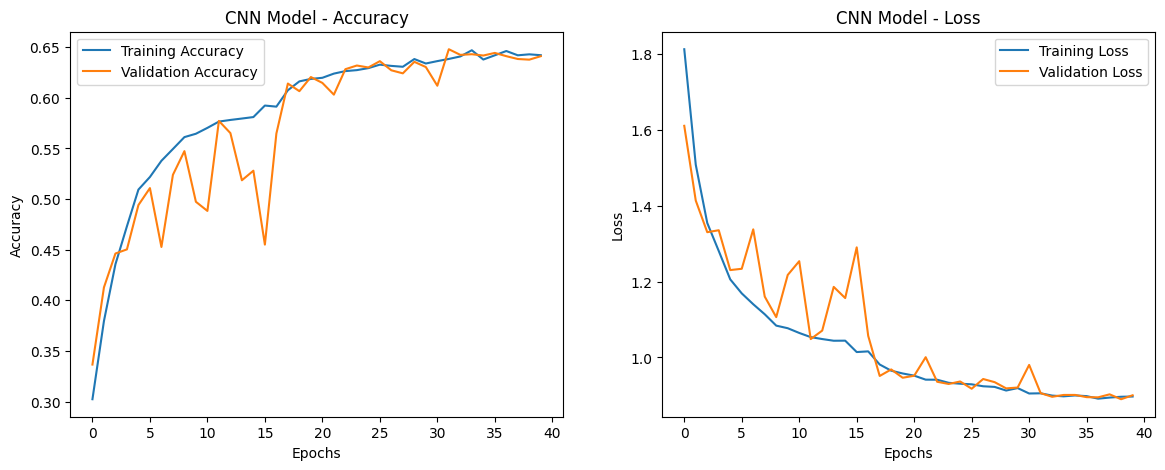

183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
Classification Report for CNN Model
              precision    recall  f1-score   support

       angry       0.55      0.62      0.58       958
    surprise       0.74      0.74      0.74       831
         sad       0.56      0.68      0.61      1247
       happy       0.84      0.87      0.85      1774
        fear       0.54      0.29      0.38      1024

    accuracy                           0.67      5834
   macro avg       0.64      0.64      0.63      5834
weighted avg       0.66      0.67      0.66      5834



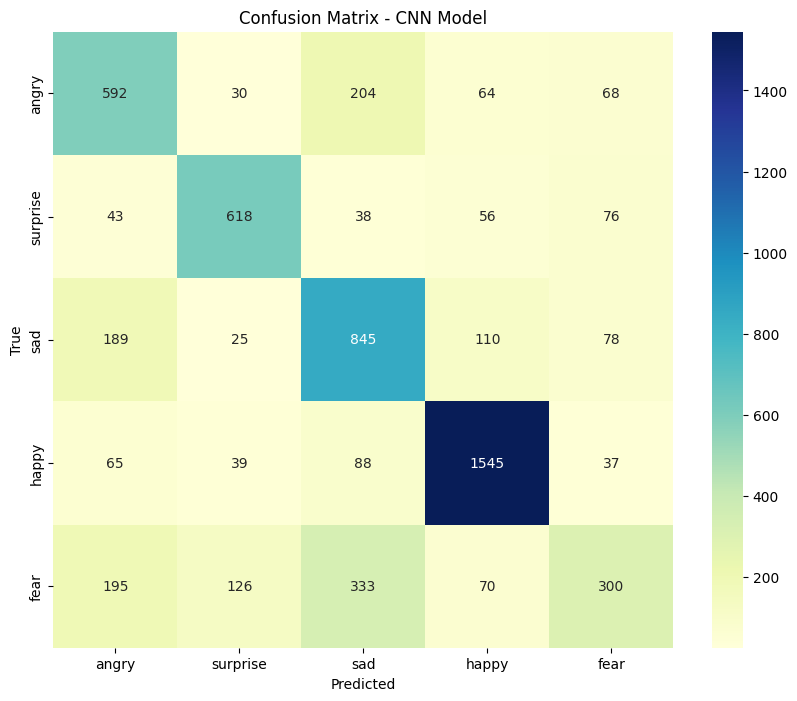

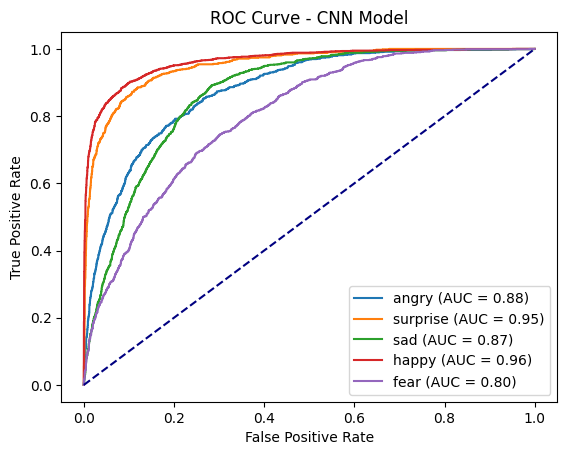

183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


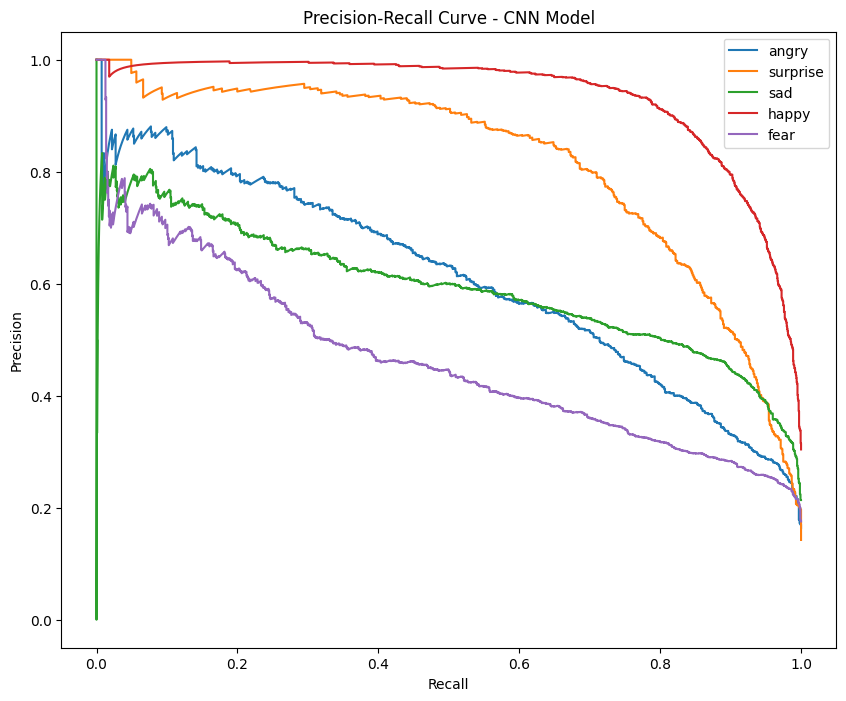

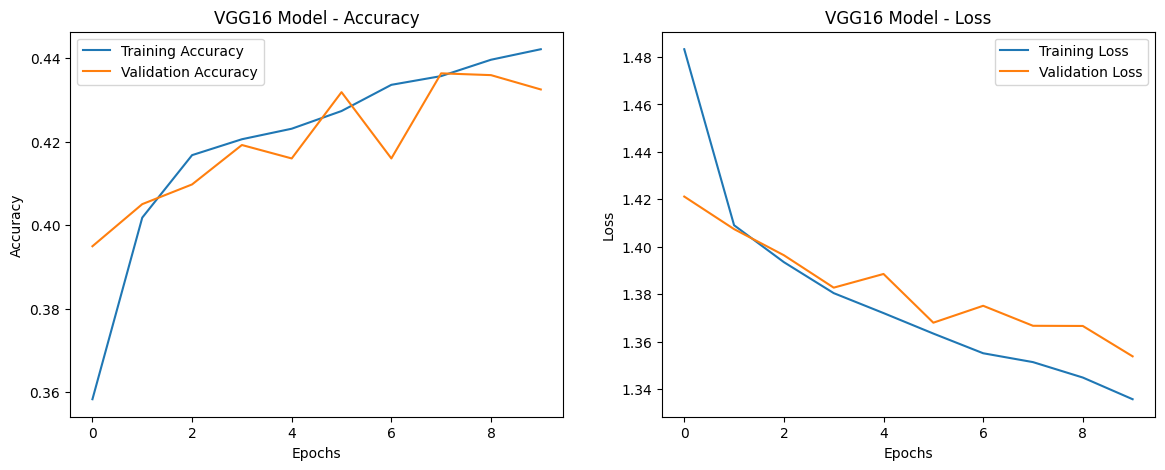

183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step
Classification Report for VGG16 Model
              precision    recall  f1-score   support

       angry       0.43      0.08      0.14       958
    surprise       0.47      0.59      0.53       831
         sad       0.42      0.19      0.26      1247
       happy       0.42      0.83      0.56      1774
        fear       0.31      0.17      0.22      1024

    accuracy                           0.42      5834
   macro avg       0.41      0.37      0.34      5834
weighted avg       0.41      0.42      0.36      5834



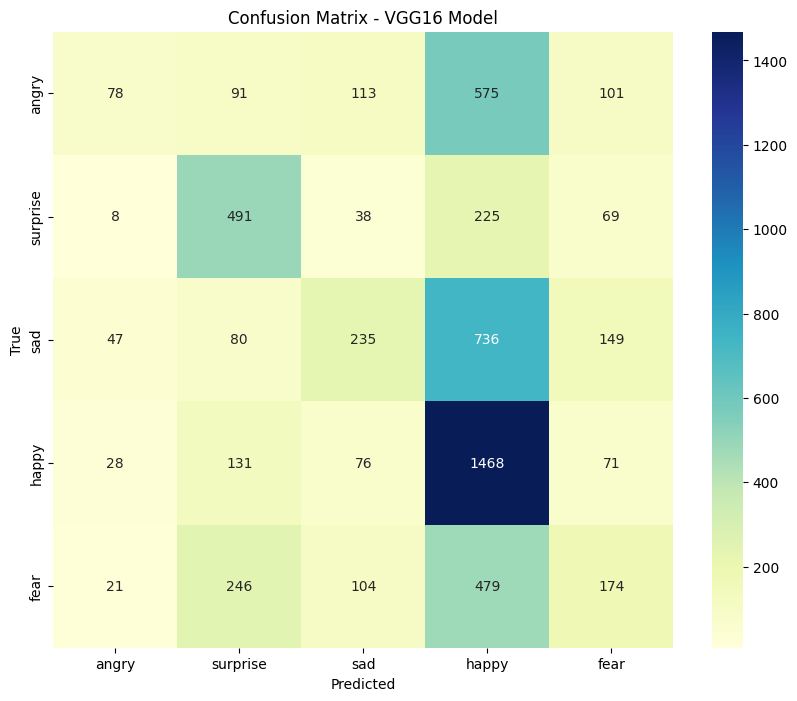

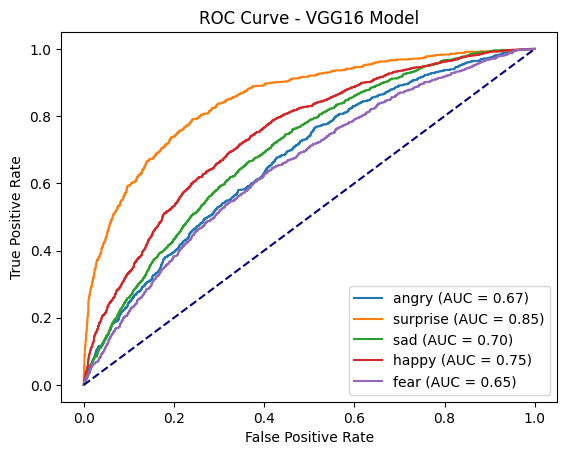

183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


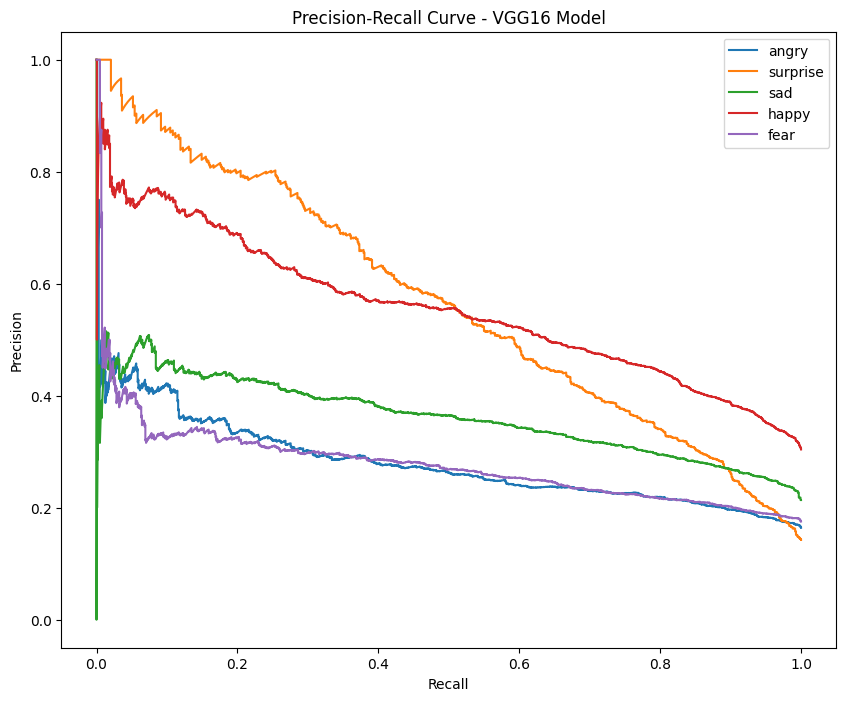

183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Classification Report for Ensemble Model
              precision    recall  f1-score   support

       angry       0.55      0.62      0.58       958
    surprise       0.74      0.74      0.74       831
         sad       0.56      0.68      0.61      1247
       happy       0.84      0.87      0.85      1774
        fear       0.54      0.29      0.38      1024

    accuracy                           0.67      5834
   macro avg       0.64      0.64      0.63      5834
weighted avg       0.66      0.67      0.66      5834



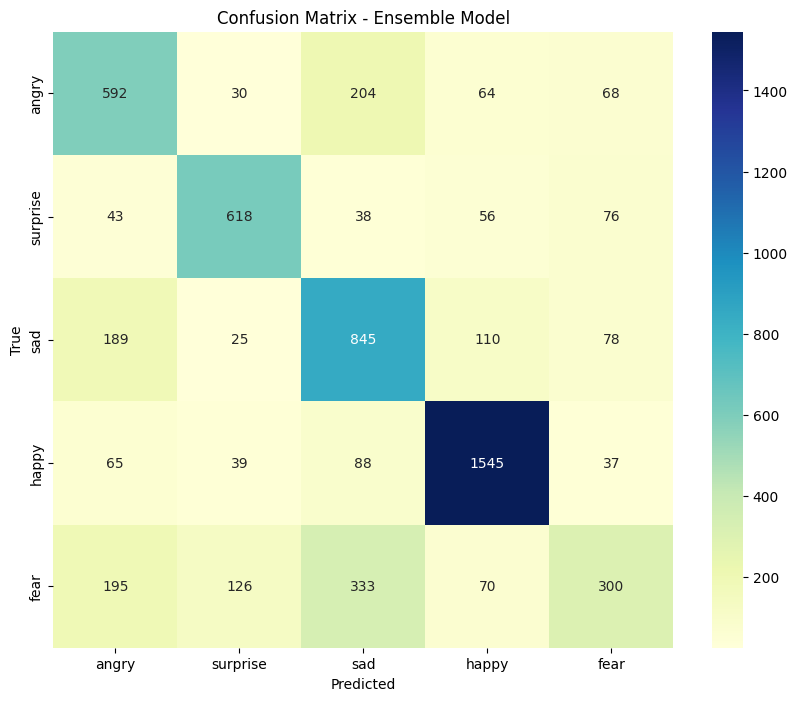

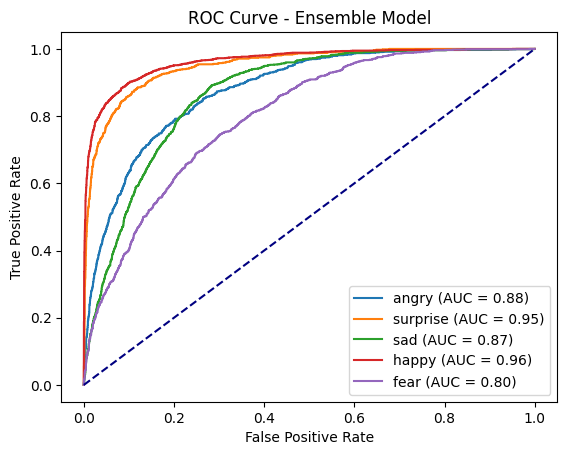

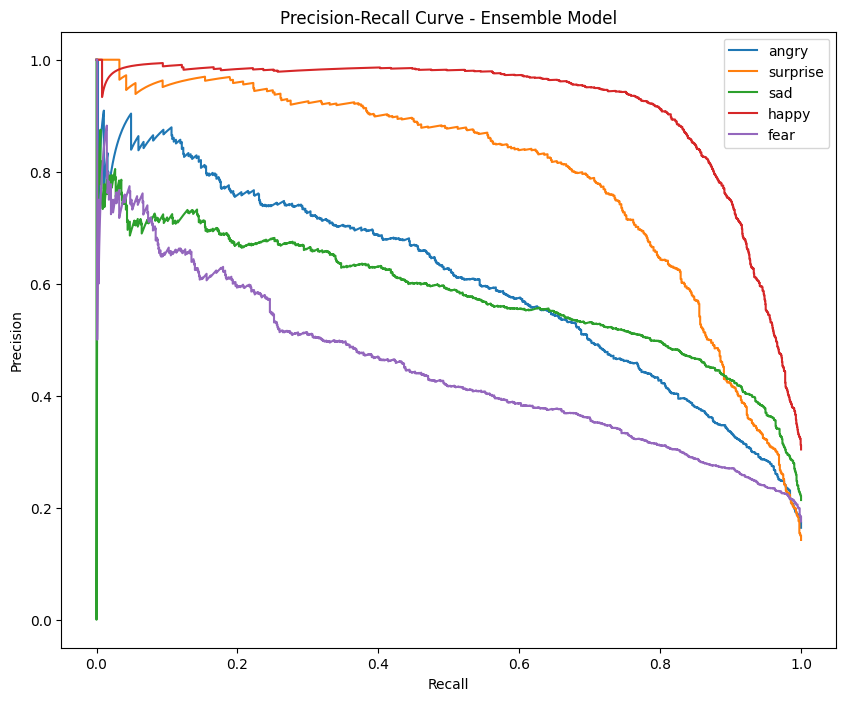

In [6]:

# ---------------------------- Configurations ---------------------------- #
IMAGE_SIZE = 48
BATCH_SIZE = 32
EPOCHS = 40

# ---------------------------- Kaggle Setup ---------------------------- #

# Paths to the FER2013+ dataset
train_dir = "./data/FER2013TrainStructured"
test_dir = "./data/FER2013TestStructured"
selected_classes = ['anger', 'surprise', 'sadness', 'happiness', 'fear']


# ---------------------------- Utility Functions ---------------------------- #
def plot_class_distribution(generator, title):
    """Plot class distribution of a dataset."""
    class_counts = generator.classes
    class_labels = list(generator.class_indices.keys())
    counts = pd.Series(class_counts).value_counts(sort=False)
    counts.index = [class_labels[i] for i in counts.index]
    counts.plot(kind='barh', title=title)
    plt.xlabel('Number of Images')
    plt.ylabel('Class')
    plt.show()

def preprocess_to_vectors(generator,feature_extractor):
    """Convert images to feature vectors for SMOTE application."""
    data, labels = [], []

    for batch_images, batch_labels in generator:
        features = feature_extractor.predict(batch_images)
        features = features.reshape(features.shape[0], -1)
        #batch_images = batch_images.reshape(batch_images.shape[0], -1)  # Flatten images
        #data.append(batch_images)
        data.append(features)
        labels.append(batch_labels)
        if len(data) * generator.batch_size >= generator.samples:
            break
    data = np.vstack(data)
    labels = np.argmax(np.vstack(labels), axis=1)
    return data, labels

def apply_ADASYN(data, labels):
    """Apply SMOTE to balance class distribution."""


    ada = ADASYN(random_state=130)
    balanced_data, balanced_labels = ada.fit_resample(data, labels)

    return balanced_data, balanced_labels

def apply_smote(data, labels):
    """Apply SMOTE to balance class distribution."""

    smote = SMOTE()
    balanced_data, balanced_labels = smote.fit_resample(data, labels)
    return balanced_data, balanced_labels

# ---------------------------- Data Preprocessing ---------------------------- #
def create_generators(train_path, test_path, img_size, batch_size, selected_classes):
    """Create training, validation, and test data generators."""
    train_preprocessor = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2
    )

    test_preprocessor = ImageDataGenerator(rescale=1./255)

    train_generator = train_preprocessor.flow_from_directory(
        train_path,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode="categorical",
        subset="training",
        classes=selected_classes
    )

    validation_generator = train_preprocessor.flow_from_directory(
        train_path,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode="categorical",
        subset="validation",
        classes=selected_classes
    )

    test_generator = test_preprocessor.flow_from_directory(
        test_path,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=False,
        classes=selected_classes
    )

    return train_generator, validation_generator, test_generator

# ---------------------------- Model Building ---------------------------- #
def build_cnn_model(input_shape, num_classes):
    """Build a CNN model."""
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    return model

def build_vgg16_model(input_shape, num_classes):
    """Build a VGG16 model with transfer learning."""
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# ---------------------------- Ensemble Model ---------------------------- #
def ensemble_predictions(models, generator):
    """Combine predictions from multiple models using weighted voting."""
    predictions = [model.predict(generator) for model in models]
    return np.mean(predictions, axis=0)

# ---------------------------- Model Evaluation ---------------------------- #
def evaluate_and_plot_metrics(model, generator, selected_classes, title):
    """Evaluate model and plot confusion matrix, ROC curve, and precision-recall curve."""
    predictions = model.predict(generator)
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = generator.classes

    print(f"Classification Report for {title}")
    print(classification_report(true_classes, pred_classes, target_names=selected_classes))

    cm = confusion_matrix(true_classes, pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=selected_classes, yticklabels=selected_classes)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    true_binary = tf.keras.utils.to_categorical(true_classes, num_classes=len(selected_classes))
    for i, class_name in enumerate(selected_classes):
        fpr, tpr, _ = roc_curve(true_binary[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
    plt.title(f"ROC Curve - {title}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# ---------------------------- PR Curve Plot ---------------------------- #
def plot_precision_recall_curve(generator, predictions, selected_classes, title):
    """Plot Precision-Recall curve for each class."""
    true_classes = generator.classes
    true_binary = tf.keras.utils.to_categorical(true_classes, num_classes=len(selected_classes))

    plt.figure(figsize=(10, 8))
    for i, class_name in enumerate(selected_classes):
        precision, recall, _ = precision_recall_curve(true_binary[:, i], predictions[:, i])
        plt.plot(recall, precision, label=f'{class_name}')

    plt.title(f'Precision-Recall Curve - {title}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

# ---------------------------- Training History Plot ---------------------------- #
def plot_training_history(history, title):
    """Plot training and validation accuracy and loss over epochs."""
    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


# ---------------------------- Pipeline Execution ---------------------------- #
if __name__ == "__main__":
    train_generator, validation_generator, test_generator = create_generators(
        TRAIN_PATH, TEST_PATH, IMAGE_SIZE, BATCH_SIZE, SELECTED_CLASSES
    )

    feature_extractor = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
    feature_extractor.trainable = False

    train_data, train_labels = preprocess_to_vectors(train_generator,feature_extractor)


    #balanced_data, balanced_labels = apply_ADASYN(train_data, train_labels)

    balanced_data, balanced_labels = apply_smote(train_data, train_labels)

    # CNN Model
    cnn_model = build_cnn_model((IMAGE_SIZE, IMAGE_SIZE, 3), len(SELECTED_CLASSES))
    cnn_model.compile(optimizer=Adam(learning_rate=0.0005), loss="categorical_crossentropy", metrics=["accuracy"])

    # VGG16 Model
    vgg16_model = build_vgg16_model((IMAGE_SIZE, IMAGE_SIZE, 3), len(SELECTED_CLASSES))
    vgg16_model.compile(optimizer=Adam(learning_rate=0.0005), loss="categorical_crossentropy", metrics=["accuracy"])

    checkpoint = ModelCheckpoint("best_model.keras", monitor="val_accuracy", save_best_only=True)
    early_stopping = EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3)

    # Train CNN Model
    history_cnn = cnn_model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=[checkpoint, early_stopping, reduce_lr]
    )


    # Train VGG16 Model
    history_vgg = vgg16_model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=[checkpoint, early_stopping, reduce_lr]
    )

    # Plot training history for CNN
    plot_training_history(history_cnn, "CNN Model")

    # Evaluate CNN Model
    evaluate_and_plot_metrics(cnn_model, test_generator, SELECTED_CLASSES, "CNN Model")

    # Generate predictions for CNN Model
    cnn_predictions = cnn_model.predict(test_generator)

    # Plot PR Curve for CNN
    plot_precision_recall_curve(test_generator, cnn_predictions, SELECTED_CLASSES, "CNN Model")

    # Plot training history for VGG16
    plot_training_history(history_vgg, "VGG16 Model")

    # Evaluate VGG16 Model
    evaluate_and_plot_metrics(vgg16_model, test_generator, SELECTED_CLASSES, "VGG16 Model")

    # Generate predictions for VGG16 Model
    vgg_predictions = vgg16_model.predict(test_generator)

    # Plot PR Curve for VGG16
    plot_precision_recall_curve(test_generator, vgg_predictions, SELECTED_CLASSES, "VGG16 Model")

    # Ensemble Predictions
    ensemble_preds = ensemble_predictions([cnn_model, vgg16_model], test_generator)
    ensemble_classes = np.argmax(ensemble_preds, axis=1)
    evaluate_and_plot_metrics(cnn_model, test_generator, SELECTED_CLASSES, "Ensemble Model")

    # Plot PR Curve for Ensemble
    plot_precision_recall_curve(test_generator, ensemble_preds, SELECTED_CLASSES, "Ensemble Model")


## MUSIC MODELS:

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2708/2708 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.5899 - loss: 0.9900 - val_accuracy: 0.7938 - val_loss: 0.5338 - learning_rate: 0.0010
Epoch 2/50
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7542 - loss: 0.6247 - val_accuracy: 0.8277 - val_loss: 0.4335 - learning_rate: 0.0010
Epoch 3/50
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7801 - loss: 0.5458 - val_accuracy: 0.8401 - val_loss: 0.3928 - learning_rate: 0.0010
Epoch 4/50
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7964 - loss: 0.5059 - val_accuracy: 0.8399 - val_loss: 0.3799 - learning_rate: 0.0010
Epoch 5/50
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8056 - loss: 0.4799 - val_accuracy: 0.8500 - val_loss: 0.3510 - learning_rate: 0.0010
Epoch 6/50
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8106 - loss: 0.4650 - val_accuracy: 0.8549 - val_loss: 0.3444 - learning_rate: 0.0010
Epoch 7/50
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8173 - loss: 0.451

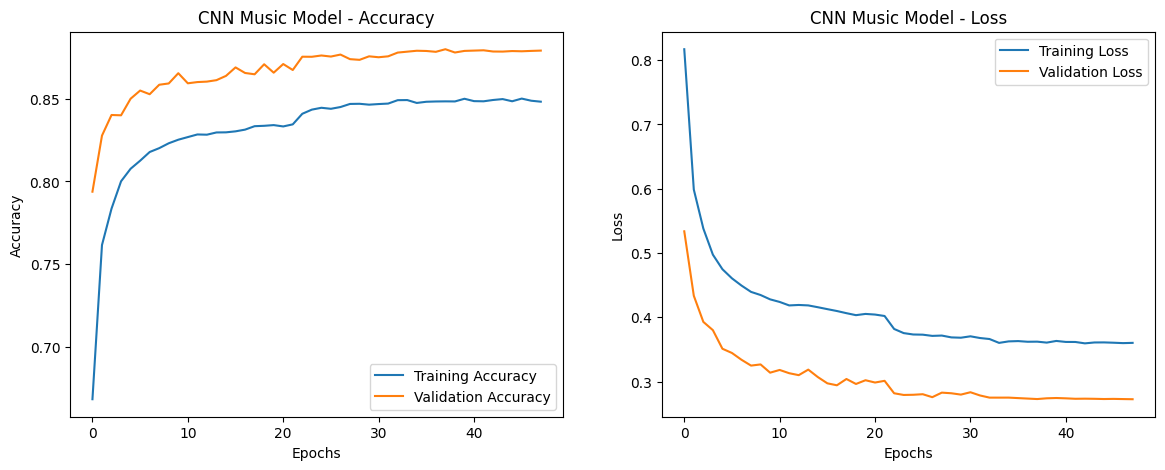

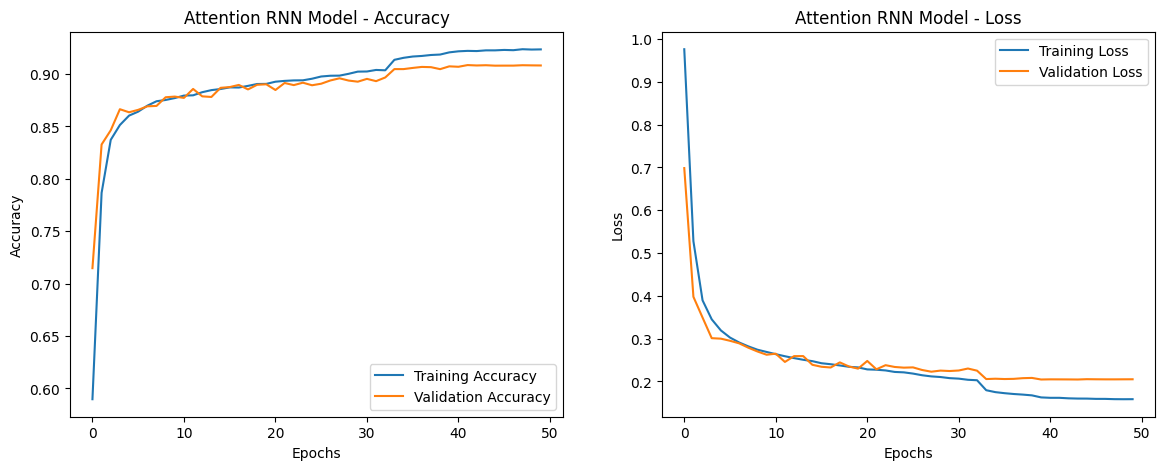

677/677 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report for CNN Music Model
              precision    recall  f1-score   support

       angry       0.91      0.99      0.95      4331
    surprise       0.90      0.99      0.94      4371
         sad       0.78      0.79      0.79      4375
       happy       0.88      0.68      0.77      4320
        fear       0.93      0.96      0.94      4264

    accuracy                           0.88     21661
   macro avg       0.88      0.88      0.88     21661
weighted avg       0.88      0.88      0.88     21661



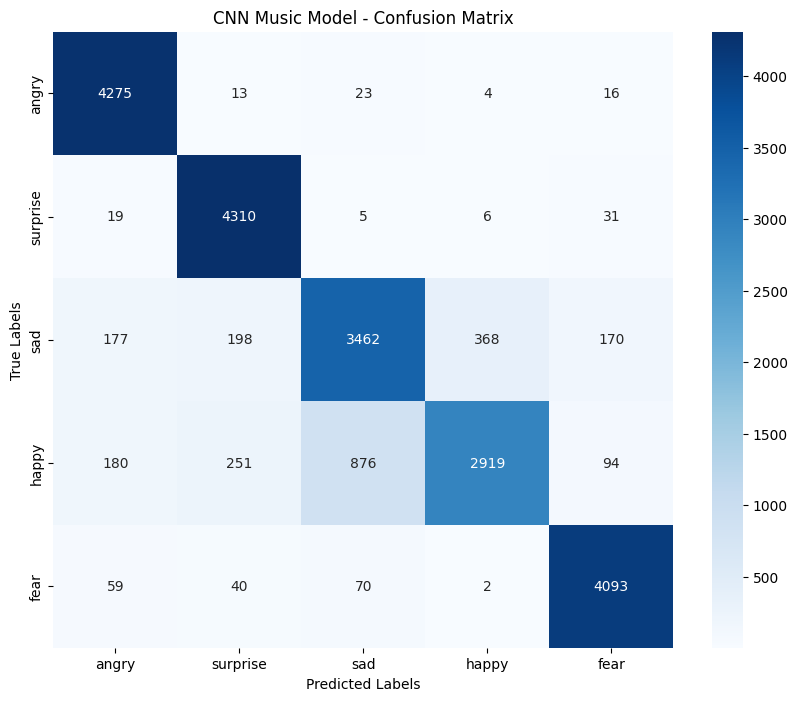

677/677 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report for Attention RNN Model
              precision    recall  f1-score   support

       angry       0.95      0.99      0.97      4331
    surprise       0.95      0.99      0.97      4371
         sad       0.83      0.81      0.82      4375
       happy       0.85      0.78      0.81      4320
        fear       0.96      0.98      0.97      4264

    accuracy                           0.91     21661
   macro avg       0.91      0.91      0.91     21661
weighted avg       0.91      0.91      0.91     21661



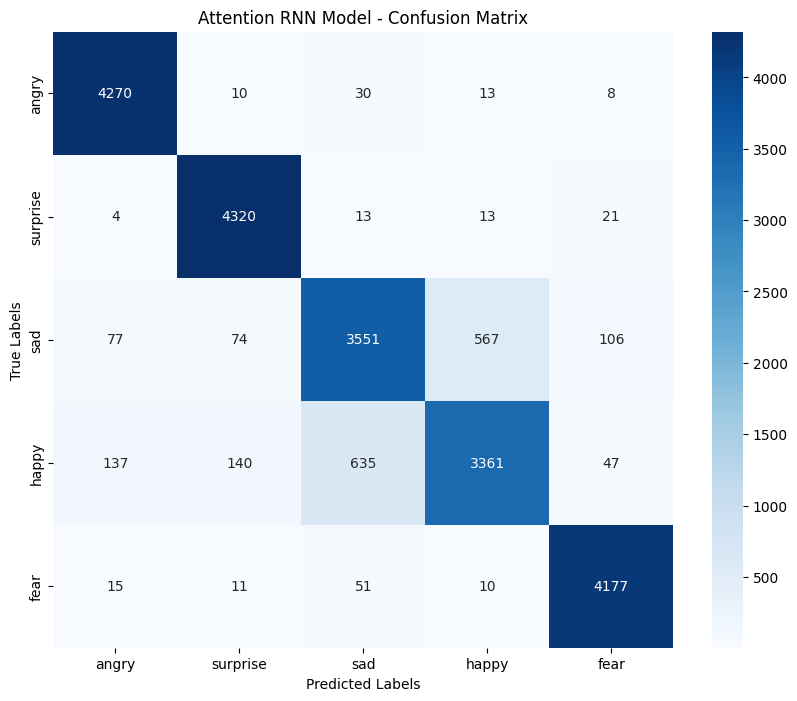

677/677 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
677/677 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


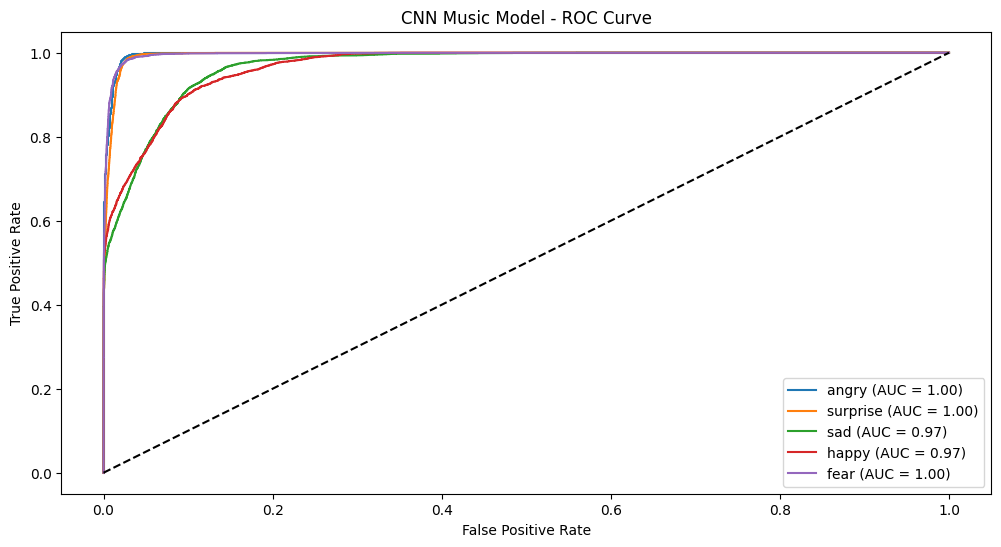

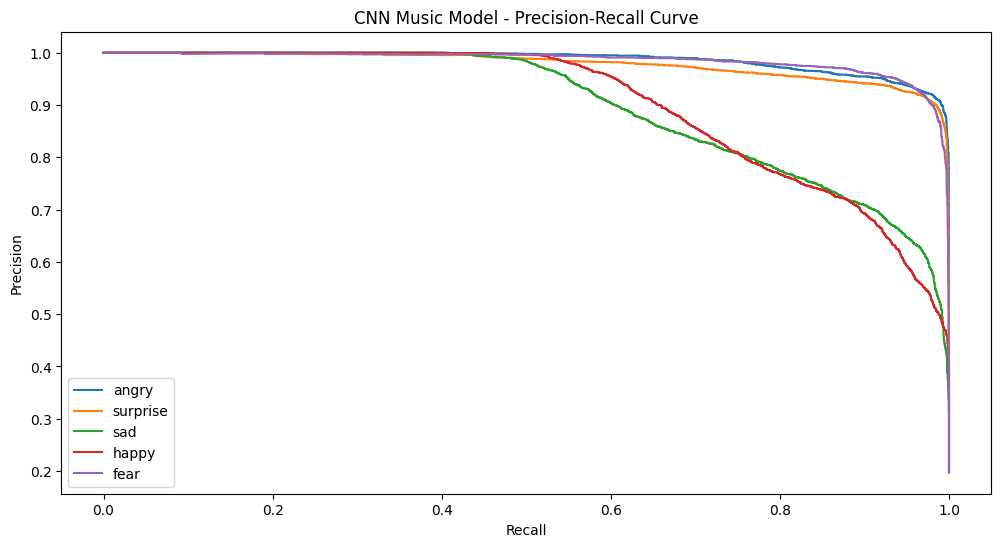

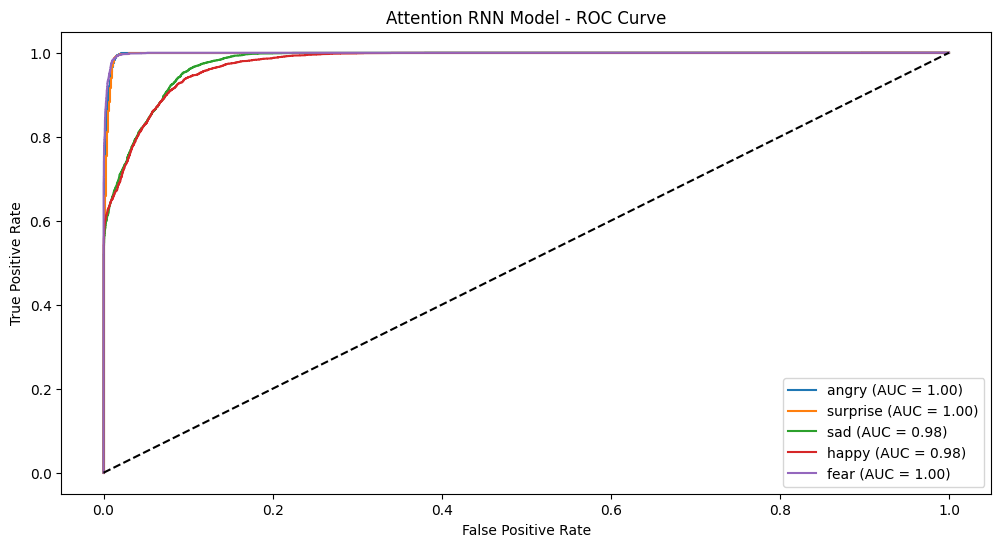

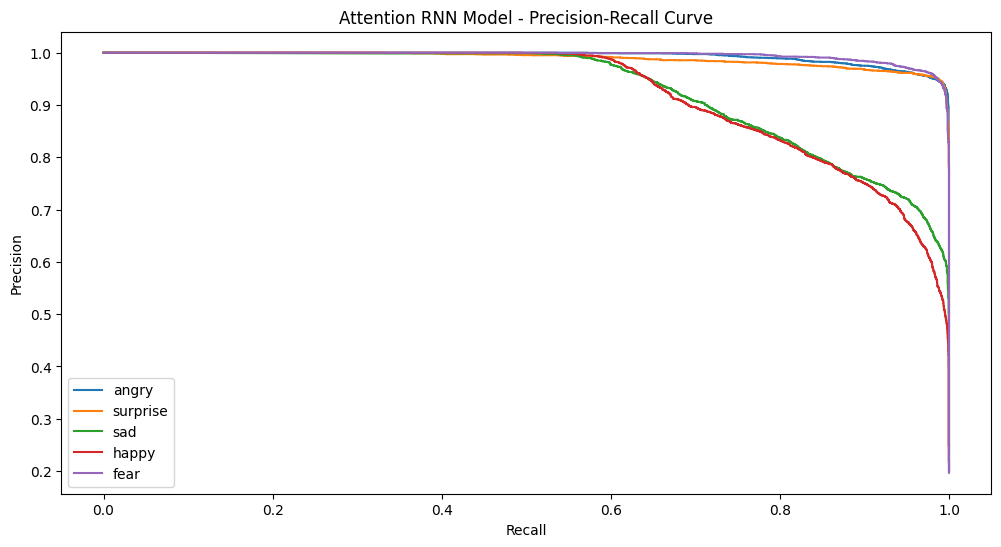

In [8]:
# Load Music Data
music_data_path = "/content/music_moods_dataset.csv"
music_data = pd.read_csv(music_data_path)

# ---------------------------- Configurations ---------------------------- #
IMAGE_SIZE = 48
BATCH_SIZE = 32
EPOCHS = 50

# ---------------------------- Selected Classes ---------------------------- #
SELECTED_MOODS = ['angry', 'surprise', 'sad', 'happy', 'fear']
SELECTED_CLASSES = ['angry', 'surprise', 'sad', 'happy', 'fear']

# ---------------------------- Music Data Preprocessing ---------------------------- #
def preprocess_music_data(music_data, selected_features, selected_moods):
    music_data = music_data[music_data['mood'].isin(selected_moods)]

    X_music = music_data[selected_features]
    y_music = music_data['mood']

    scaler = StandardScaler()
    X_music_scaled = scaler.fit_transform(X_music)

    encoder = OneHotEncoder(sparse_output=False)
    y_music_encoded = encoder.fit_transform(y_music.values.reshape(-1, 1))

    # Apply SMOTE to balance the dataset
    smote = SMOTE(random_state=42)
    X_music_balanced, y_music_balanced = smote.fit_resample(X_music_scaled, y_music_encoded)

    music_train_features, music_val_features, music_train_labels, music_val_labels = train_test_split(
        X_music_balanced, y_music_balanced, test_size=0.2, random_state=42
    )

    # Reshape for Conv1D compatibility
    music_train_features = music_train_features.reshape(-1, len(selected_features), 1)
    music_val_features = music_val_features.reshape(-1, len(selected_features), 1)

    return music_train_features, music_val_features, music_train_labels, music_val_labels

# ---------------------------- Music Model ---------------------------- #
def create_music_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2, strides=1, padding='same'),
        Dropout(0.3),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2, strides=1, padding='same'),
        Dropout(0.3),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# ---------------------------- Attention-Based RNN for Music ---------------------------- #
def build_attention_rnn(input_shape, num_classes):
    """Build an Attention-Based RNN model."""
    inputs = Input(shape=input_shape)
    x = LSTM(64, return_sequences=True)(inputs)
    x = Attention()([x, x])
    x = LSTM(32)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# ---------------------------- Training and Evaluation ---------------------------- #
def train_and_evaluate_model(model, train_features, train_labels, val_features, val_labels):
    """Train and evaluate a model."""
    callbacks = [
        EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)
    ]

    history = model.fit(
        train_features, train_labels,
        validation_data=(val_features, val_labels),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=callbacks
    )

    score = model.evaluate(val_features, val_labels)
    print(f"Model Test Accuracy: {score[1] * 100:.2f}%")
    return history

# ---------------------------- Plotting Utilities ---------------------------- #
def plot_training_history(history, title):
    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

def plot_confusion_matrix_and_report(model, features, labels, selected_classes, title):
    """Plot confusion matrix and classification report for a model."""
    predictions = model.predict(features)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(labels, axis=1)

    # Classification Report
    print(f"\nClassification Report for {title}")
    print(classification_report(true_labels, predicted_labels, target_names=selected_classes))

    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=selected_classes, yticklabels=selected_classes)
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

def plot_roc_pr_curves(y_true, y_probs, selected_classes, model_name):
    """Plot ROC and Precision-Recall curves."""
    num_classes = y_true.shape[1]

    # ROC Curve
    plt.figure(figsize=(12, 6))
    for i, class_name in enumerate(selected_classes):
        fpr, tpr, _ = roc_curve(y_true[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{model_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="best")
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(12, 6))
    for i, class_name in enumerate(selected_classes):
        precision, recall, _ = precision_recall_curve(y_true[:, i], y_probs[:, i])
        plt.plot(recall, precision, label=f'{class_name}')
    plt.title(f"{model_name} - Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="best")
    plt.show()

# ---------------------------- Execution Example ---------------------------- #
selected_features = [
    'danceability', 'energy', 'valence', 'tempo', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'loudness'
]

# Data Preparation
music_train_features, music_val_features, music_train_labels, music_val_labels = preprocess_music_data(
    music_data, selected_features, SELECTED_MOODS
)

# CNN Model
cnn_music_model = create_music_model((len(selected_features), 1), len(SELECTED_CLASSES))
cnn_music_history = train_and_evaluate_model(cnn_music_model, music_train_features, music_train_labels, music_val_features, music_val_labels)

# Attention RNN Model
rnn_model = build_attention_rnn((len(selected_features), 1), len(SELECTED_CLASSES))
rnn_history = train_and_evaluate_model(rnn_model, music_train_features, music_train_labels, music_val_features, music_val_labels)

# Plot Training Histories
plot_training_history(cnn_music_history, "CNN Music Model")
plot_training_history(rnn_history, "Attention RNN Model")

# Evaluate Models with Confusion Matrix and Classification Report
plot_confusion_matrix_and_report(cnn_music_model, music_val_features, music_val_labels, SELECTED_CLASSES, "CNN Music Model")
plot_confusion_matrix_and_report(rnn_model, music_val_features, music_val_labels, SELECTED_CLASSES, "Attention RNN Model")

# ROC and Precision-Recall Curves
cnn_music_probs = cnn_music_model.predict(music_val_features)
rnn_probs = rnn_model.predict(music_val_features)

plot_roc_pr_curves(music_val_labels, cnn_music_probs, SELECTED_CLASSES, "CNN Music Model")
plot_roc_pr_curves(music_val_labels, rnn_probs, SELECTED_CLASSES, "Attention RNN Model")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 971ms/step
Individual Model Predictions:
Model 1: happy (97.06%)
Model 2: happy (68.53%)

Final Combined Prediction: happy (82.80%)


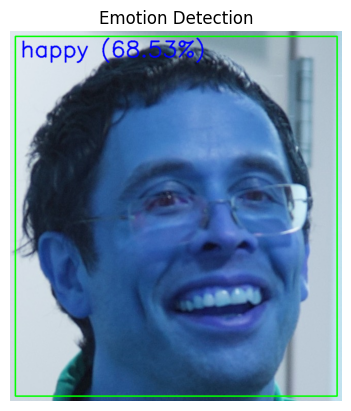


Recommended Songs for 'happy' Emotion:
                            track                          artist decade  \
0                     Wild Things                    Alessia Cara  2010s   
4   Juju On That Beat (TZ Anthem)  Zay Hilfigerrr & Zayion McCall  2010s   
5      Here's To Never Growing Up                   Avril Lavigne  2010s   
7                   Helluva Night                        Ludacris  2010s   
9                         My Last  Big Sean Featuring Chris Brown  2010s   
15                  Hotline Bling                           Drake  2010s   
16                    Cut Her Off        KCamp Featuring 2 Chainz  2010s   
20                     Windshield              Greensky Bluegrass  2010s   
22                         Faster                  Matt Nathanson  2010s   
25             Art House Director             Broken Social Scene  2010s   

     mood  
0   happy  
4   happy  
5   happy  
7   happy  
9   happy  
15  happy  
16  happy  
20  happy  
22  happy  
25 

In [ ]:
# ---------------------------- Preprocessing Functions ---------------------------- #
def preprocess_image(img_path, target_size=(48, 48)):
    """
    Preprocess an input image for emotion detection.

    Args:
        img_path (str): Path to the input image.
        target_size (tuple): Desired size for resizing the image.

    Returns:
        tuple: Original image and preprocessed image array.
    """
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image, target_size)
    image_array = img_to_array(image_resized) / 255.0  # Normalize pixel values
    return image, np.expand_dims(image_array, axis=0)

# ---------------------------- Emotion Detection ---------------------------- #
def detect_emotion(img_path, emotion_model, music_data, selected_classes):
    """
    Detect emotion from an input image and recommend songs based on the emotion.

    Args:
        img_path (str): Path to the input image.
        emotion_model (Model): Trained emotion detection model.
        music_data (DataFrame): Dataset containing song recommendations.

    Returns:
        None
    """
    # Preprocess the input image
    original_image, preprocessed_image = preprocess_image(img_path)




    emotion_label = final_emotion_label
    # Annotate and display the detected emotion on the image
    display_emotion_on_image(original_image, emotion_label, final_confidence)

    # Recommend songs based on detected emotion
    recommend_songs(emotion_label, music_data)

# ---------------------------- Image Annotation ---------------------------- #
def display_emotion_on_image(image, emotion_label, confidence):
    """
    Annotate an image with the detected emotion label and confidence score.

    Args:
        image (array): Original image to annotate.
        emotion_label (str): Detected emotion label.
        confidence (float): Confidence score for the detected emotion.

    Returns:
        None
    """
    annotated_image = image.copy()
    h, w, _ = annotated_image.shape

    # Adjust font size and thickness based on image dimensions
    font_scale = max(w, h) / 500
    thickness = int(max(w, h) / 300)

    # Draw rectangle and text
    cv2.rectangle(annotated_image, (10, 10), (w - 10, h - 10), (0, 255, 0), thickness)
    text = f"{emotion_label} ({confidence * 100:.2f}%)"
    text_x, text_y = 20, 50
    cv2.putText(
        annotated_image, text, (text_x, text_y),
        cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 0, 0), thickness, cv2.LINE_AA
    )

    # Display the annotated image
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.title("Emotion Detection")
    plt.axis("off")
    plt.show()

# ---------------------------- Song Recommendation ---------------------------- #
def recommend_songs(emotion_label, music_data):
    """
    Recommend songs based on the detected emotion.

    Args:
        emotion_label (str): Detected emotion label.
        music_data (DataFrame): Dataset containing song recommendations.

    Returns:
        None
    """
    recommended_songs = music_data[music_data['mood'] == emotion_label].head(10)
    print(f"\nRecommended Songs for '{emotion_label}' Emotion:")
    print(recommended_songs[['track', 'artist', 'decade', 'mood']])

# ---------------------------- Example Usage ---------------------------- #
img_path = "/content/pasc.png"  # Path to the input image

# Assume cnn_model and vgg16_model are trained emotion models
#print("\nResults from CNN Model:")
#detect_emotion(img_path, cnn_model, music_data)

#print("\nResults from VGG-16 Model:")
#detect_emotion(img_path, vgg16_model, music_data)

models = [cnn_model, vgg16_model]
selected_classes = ['angry', 'surprise', 'sad', 'happy', 'fear']
detect_emotion(img_path, models, music_data, selected_classes)

## WEBCAM + YOUTUBE SETUP:

In [ ]:
def capture_photo():
    """Capture photo from webcam in Colab and save to content folder"""
    # First, cleanup any existing instances
    cleanup_js = Javascript('''
        const existingDivs = document.getElementsByClassName('webcam-capture');
        while(existingDivs.length > 0) {
            existingDivs[0].remove();
        }
    ''')
    display(cleanup_js)

    js = Javascript('''
        async function takePhoto() {
            if (document.getElementsByClassName('webcam-capture').length > 0) {
                return null;  // Don't create new if one exists
            }

            const div = document.createElement('div');
            div.className = 'webcam-capture';
            const capture = document.createElement('button');
            const cancel = document.createElement('button');
            const video = document.createElement('video');
            const canvas = document.createElement('canvas');

            capture.textContent = 'Capture';
            cancel.textContent = 'Cancel';
            cancel.style.marginLeft = '10px';

            div.appendChild(video);
            div.appendChild(capture);
            div.appendChild(cancel);

            let stream = null;
            try {
                // Stop any existing streams
                const existingStreams = document.querySelectorAll('video').forEach(v => {
                    if (v.srcObject) {
                        v.srcObject.getTracks().forEach(track => track.stop());
                    }
                });

                stream = await navigator.mediaDevices.getUserMedia({video: true});
                video.srcObject = stream;
                await video.play();

                canvas.width = video.videoWidth;
                canvas.height = video.videoHeight;
            } catch (err) {
                console.error('Error:', err);
                div.remove();
                return null;
            }

            return new Promise((resolve) => {
                capture.onclick = () => {
                    canvas.getContext('2d').drawImage(video, 0, 0);
                    stream.getTracks().forEach(track => track.stop());
                    div.remove();
                    resolve(canvas.toDataURL('image/jpeg'));
                };

                cancel.onclick = () => {
                    stream.getTracks().forEach(track => track.stop());
                    div.remove();
                    resolve(null);
                };

                document.body.appendChild(div);
            });
        }

        takePhoto();
    ''')

    display(js)

    try:
        data = eval_js('takePhoto()')
        if data is None:
            print("Capture cancelled or failed")
            return None

        binary = b64decode(data.split(',')[1])
        image_path = '/content/captured_emotion.jpg'
        with open(image_path, 'wb') as f:
            f.write(binary)
        return image_path
    except Exception as e:
        print(f"Error during capture: {e}")
        return None

In [6]:
# Added function for webcam capture
def run_emotion_detection(emotion_models, music_data):
    # Capture photo from webcam
    print("Click 'Capture' when ready to take a photo...")
    img_path = capture_photo()
    print("Photo captured and saved!")

    # Run detection with each model
    for model_name, model in emotion_models.items():
        print(f"\nResults from {model_name}:")
        detect_emotion(img_path, model, music_data,selected_classes)

emotion_models = {
    'CNN Model': cnn_model,
    'VGG-16 Model': vgg16_model
}

# Run the complete pipeline
run_emotion_detection(emotion_models, music_data)

NameError: name 'cnn_model' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Individual Model Predictions:
Model 1: happy (97.06%)
Model 2: happy (68.53%)

Final Combined Prediction: happy (62.24%)


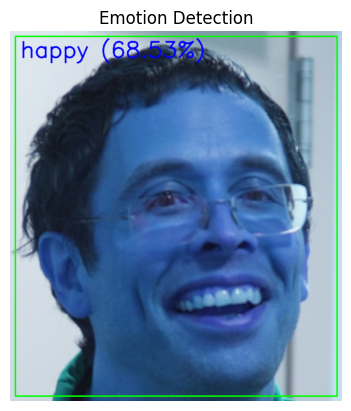


Recommended Songs for 'happy' Emotion:

1. Say My Name by Destiny's Child (2000s)
YouTube Link: https://www.youtube.com/results?search_query=Say%20My%20Name%20Destiny%27s%20Child%20official
YouTube Search URL: https://www.youtube.com/results?search_query=Say%20My%20Name%20Destiny%27s%20Child%20official

2. Can You Get To That by Funkadelic (1970s)
YouTube Link: https://www.youtube.com/results?search_query=Can%20You%20Get%20To%20That%20Funkadelic%20official
YouTube Search URL: https://www.youtube.com/results?search_query=Can%20You%20Get%20To%20That%20Funkadelic%20official

3. Cross Me by Ed Sheeran Featuring Chance The Rapper & PnB Rock (2010s)
YouTube Link: https://www.youtube.com/results?search_query=Cross%20Me%20Ed%20Sheeran%20Featuring%20Chance%20The%20Rapper%20%26%20PnB%20Rock%20official
YouTube Search URL: https://www.youtube.com/results?search_query=Cross%20Me%20Ed%20Sheeran%20Featuring%20Chance%20The%20Rapper%20%26%20PnB%20Rock%20official

4. My Mammy by The Happenings (1960s)


In [ ]:
# Function to open a YouTube search in the default web browser
def open_youtube_search(query):
    search_url = f"https://www.youtube.com/results?search_query={quote(query)}"
    print(f"YouTube Search URL: {search_url}")
    webbrowser.open(search_url)

# Function to preprocess an input image
def preprocess_image(img_path, target_size=(48, 48)):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image, target_size)
    image_array = img_to_array(image_resized) / 255.0  # Normalize
    return image, np.expand_dims(image_array, axis=0)

# Function to detect emotion from an image
def detect_emotion(img_path, models, music_data):
    # Preprocess image
    original_image, preprocessed_image = preprocess_image(img_path)

    predictions = []
    model_results = []   # For storing individual model predictions and weights

    for i, model in enumerate(models):
        prediction = model.predict(preprocessed_image)
        predictions.append(prediction)

        # Get individual model's predicted emotion and confidence
        emotion_idx = np.argmax(prediction)
        emotion_label = selected_classes[emotion_idx]
        confidence = prediction[0][emotion_idx]

        # Store model results
        model_results.append((f"Model {i+1}", emotion_label, confidence))

    # Print individual model predictions
    print("Individual Model Predictions:")

    for model_name, emotion_label, confidence in model_results:
        print(f"{model_name}: {emotion_label} ({confidence * 100:.2f}%)")


    model_weights = [0.5, 0.2, 0.3]

    weighted_predictions = np.zeros_like(predictions[0])  # 初始化加权预测数组

    for pred, weight in zip(predictions, model_weights):
      weighted_predictions += pred * weight  # 累加加权预测结果

    final_emotion_idx = np.argmax(weighted_predictions)
    final_emotion_label = selected_classes[final_emotion_idx]
    final_confidence = weighted_predictions[0][final_emotion_idx]

    print(f"\nFinal Combined Prediction: {final_emotion_label} ({final_confidence * 100:.2f}%)")


    # Draw bounding box and label on the image
    annotated_image = original_image.copy()
    h, w, _ = annotated_image.shape

    # Adjust font size and thickness based on image dimensions
    font_scale = max(w, h) / 500  # Scale font size based on image width/height
    thickness = int(max(w, h) / 300)  # Scale thickness for better visibility

    # Draw rectangle
    cv2.rectangle(annotated_image, (10, 10), (w - 10, h - 10), (0, 255, 0), thickness)

    # Add text with dynamic size
    text = f"{emotion_label} ({confidence * 100:.2f}%)"
    text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
    text_x = 20  # Starting position for text
    text_y = text_size[1] + 20

    cv2.putText(
        annotated_image,
        text,
        (text_x, text_y),
        cv2.FONT_HERSHEY_SIMPLEX,
        font_scale,
        (255, 0, 0),
        thickness,
        cv2.LINE_AA
    )

    # Show the annotated image
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.title("Emotion Detection")
    plt.axis("off")
    plt.show()

    # Recommend songs based on emotion
    recommend_songs_with_youtube(emotion_label, music_data)



def recommend_songs_with_youtube(emotion_label, music_data):
    # Filter songs by emotion
    emotion_songs = music_data[music_data['mood'] == emotion_label]

    # Group songs by decade
    decade_songs = defaultdict(list)
    for _, song in emotion_songs.iterrows():
        decade_songs[song['decade']].append(song)

    # Shuffle songs within each decade
    for decade in decade_songs:
        random.shuffle(decade_songs[decade])

    recommended_songs = []
    available_decades = list(decade_songs.keys())

    # First, randomly select one song from each available decade
    random.shuffle(available_decades)  # Randomize decade order
    for decade in available_decades:
        if decade_songs[decade]:
            recommended_songs.append(decade_songs[decade].pop())

    # If we need more songs to reach 5, randomly select from remaining songs
    remaining_songs = []
    for songs in decade_songs.values():
        remaining_songs.extend(songs)

    # Shuffle remaining songs
    random.shuffle(remaining_songs)

    # Fill up to 5 songs
    while len(recommended_songs) < 5 and remaining_songs:
        recommended_songs.append(remaining_songs.pop())

    # Shuffle final list to randomize presentation order
    random.shuffle(recommended_songs)

    # Print recommendations
    print(f"\nRecommended Songs for '{emotion_label}' Emotion:")
    print("=" * 80)

    for idx, song in enumerate(recommended_songs, 1):
        print(f"\n{idx}. {song['track']} by {song['artist']} ({song['decade']})")
        search_query = f"{song['track']} {song['artist']} official"
        print(f"YouTube Link: https://www.youtube.com/results?search_query={quote(search_query)}")

        # Automatically open YouTube search for each song
        open_youtube_search(search_query)

    # Print decade distribution
    print("\n" + "=" * 80)
    print("\nDecade Distribution:")
    decades_found = {song['decade'] for song in recommended_songs}
    for decade in sorted(decades_found):
        count = sum(1 for song in recommended_songs if song['decade'] == decade)
        print(f"{decade}: {count} song(s)")

    print("\n" + "=" * 80)

# Optional: Add a cache to prevent recent recommendations
class RecommendationCache:
    def __init__(self, cache_size=20):
        self.cache_size = cache_size
        self.recent_recommendations = []

    def add_recommendation(self, song):
        if song not in self.recent_recommendations:
            self.recent_recommendations.append(song)
            if len(self.recent_recommendations) > self.cache_size:
                self.recent_recommendations.pop(0)

    def is_recently_recommended(self, song):
        return song in self.recent_recommendations

# Initialize cache
recommendation_cache = RecommendationCache(cache_size=20)

def recommend_music_from_image(img_path, model_choice=None, models=None):
    """
    Wrapper function to handle emotion detection and music recommendation.

    Args:
        img_path (str): Path to the input image.
        model_choice (str): Either "cnn" or "vgg16" to use a specific model.
        models (list): List of models for ensemble predictions.

    Returns:
        None
    """
    if model_choice is not None:
        # Use a specific model
        model_map = {
            "cnn": cnn_model,
            "vgg16": vgg16_model,
        }

        if model_choice not in model_map:
            raise ValueError(f"Invalid model choice. Choose from: {list(model_map.keys())}")

        model = model_map[model_choice]
        detect_emotion(img_path, [model], music_data)  # Use a single model
    elif models is not None:
        # Use ensemble of models
        detect_emotion(img_path, models, music_data)
    else:
        raise ValueError("Either 'model_choice' or 'models' must be provided.")

# Example usage:s
img_path = "/content/pasc.png"   #/content/pasc.png or /content/captured_emotion.jpg
selected_classes = ['angry', 'surprise', 'sad', 'happy', 'fear']
models = [cnn_model, vgg16_model]
recommend_music_from_image(img_path, models=models)
